# 얼굴 인식 등의 이미지 관련 API 사용

## 1. 네이버 얼굴인식 기능

In [ ]:
# setting to get api key outside the Jupyter notebook 
from dotenv import load_dotenv
import os
load_dotenv('.env')

# using env file to access the api key while not exposing it on the code
client_id = os.getenv('client_id')  
client_secret = os.getenv('client_secret')

In [1]:
#https://developers.naver.com/docs/clova/api
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

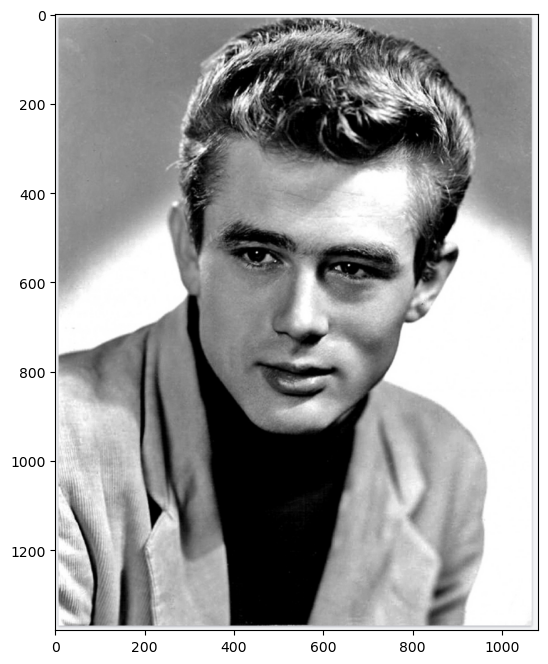

In [104]:
img = mpimg.imread('../data/naver/face_test_01.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [183]:
import requests

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image': open('../data/naver/face_test_03.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url,  files=files, headers=headers)

In [184]:
#JSON은 Java Script Object Notation의 약자로 
#웹서버와 클라이언트 간의 데이터 교환에 많이 사용
#json은 dict와 유사한 구조-> API를 사용한 결과 json 데이터 형태로 출력

import json

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, 
                 ensure_ascii=False))

#네이버 유명인 인식 api 적용 결과

{
    "info": {
        "size": {
            "width": 997,
            "height": 1280
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "이유미",
                "confidence": 0.715959
            }
        }
    ]
}


In [186]:
#얼굴 감지 API
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('../data/naver/face_test_03.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url, files=files, headers=headers)

parsed = json.loads(response.text)

#ensure_ascii=False : utf-8로 인코딩된 한글을 제대로 표시해 줌
print(json.dumps(parsed, indent=4, sort_keys=False, 
                 ensure_ascii=False))
# roi : 관심 영역

{
    "info": {
        "size": {
            "width": 997,
            "height": 1280
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 305,
                "y": 350,
                "width": 390,
                "height": 390
            },
            "landmark": {
                "leftEye": {
                    "x": 396,
                    "y": 440
                },
                "rightEye": {
                    "x": 592,
                    "y": 438
                },
                "nose": {
                    "x": 495,
                    "y": 546
                },
                "leftMouth": {
                    "x": 424,
                    "y": 633
                },
                "rightMouth": {
                    "x": 560,
                    "y": 636
                }
            },
            "gender": {
                "value": "female",
                "confidence": 0.999768
            },
        

## 2. 인식된 얼굴 사진에 정보를 표시

In [187]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('../data/naver/face_test_03.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)

In [188]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [189]:
detect_result['faces']

[{'roi': {'x': 305, 'y': 350, 'width': 390, 'height': 390},
  'landmark': {'leftEye': {'x': 396, 'y': 440},
   'rightEye': {'x': 592, 'y': 438},
   'nose': {'x': 495, 'y': 546},
   'leftMouth': {'x': 424, 'y': 633},
   'rightMouth': {'x': 560, 'y': 636}},
  'gender': {'value': 'female', 'confidence': 0.999768},
  'age': {'value': '22~26', 'confidence': 1.0},
  'emotion': {'value': 'neutral', 'confidence': 1.0},
  'pose': {'value': 'frontal_face', 'confidence': 0.999983}}]

In [190]:
detect_result['faces'][0]

{'roi': {'x': 305, 'y': 350, 'width': 390, 'height': 390},
 'landmark': {'leftEye': {'x': 396, 'y': 440},
  'rightEye': {'x': 592, 'y': 438},
  'nose': {'x': 495, 'y': 546},
  'leftMouth': {'x': 424, 'y': 633},
  'rightMouth': {'x': 560, 'y': 636}},
 'gender': {'value': 'female', 'confidence': 0.999768},
 'age': {'value': '22~26', 'confidence': 1.0},
 'emotion': {'value': 'neutral', 'confidence': 1.0},
 'pose': {'value': 'frontal_face', 'confidence': 0.999983}}

In [191]:
#각도의 위치(region of interest) -x,y좌표, 높이, 넓이
detect_result['faces'][0]['roi']

{'x': 305, 'y': 350, 'width': 390, 'height': 390}

In [192]:
detect_result['faces'][0]['gender']

{'value': 'female', 'confidence': 0.999768}

In [193]:
detect_result['faces'][0]['age']

{'value': '22~26', 'confidence': 1.0}

In [194]:
detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 1.0}

In [195]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = \
detect_result['faces'][0]['gender'].values()

emotion, emotion_confidence = \
detect_result['faces'][0]['emotion'].values()

age, age_confidence = detect_result['faces'][0]['age'].values()

In [196]:
annotation = gender + ' : ' + str(gen_confidence) + \
                '\n' + emotion + ' : ' + str(emotion_confidence) + \
                '\n' + age + ' : ' + str(age_confidence)

print(annotation)

female : 0.999768
neutral : 1.0
22~26 : 1.0


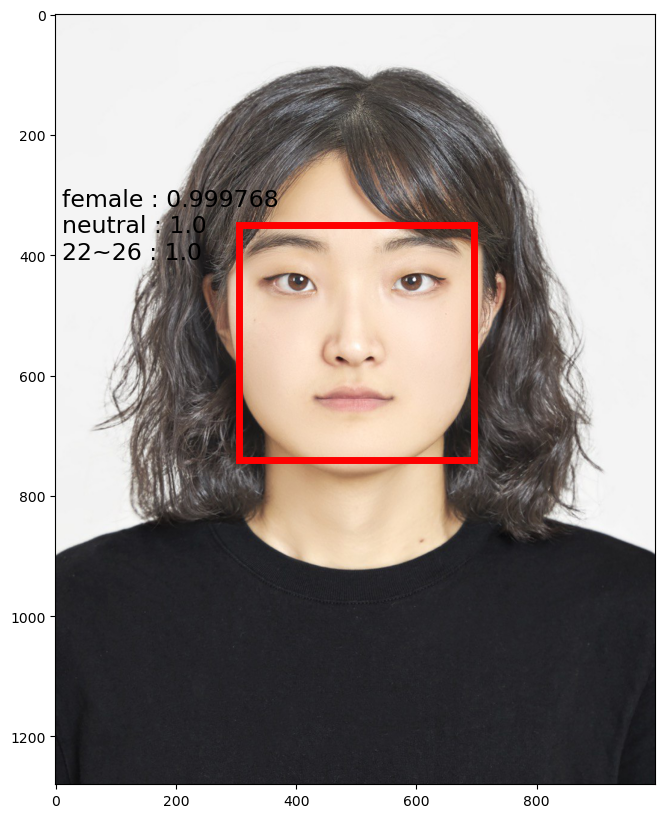

In [197]:
#patches : 사진에 도형을 그릴 수 있게 도와주는 모듈
import matplotlib.patches as patches
img = mpimg.imread('../data/naver/face_test_03.jpg')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y),w,h,
                              linewidth=5,
                              edgecolor='r',
                              facecolor='none')
ax.add_patch(rect_face)

plt.text(10, 400 , annotation, wrap=True, 
         fontsize=17, color='black')
plt.show()

## 3. 여러 얼굴이 있는 사진에 대한 정보를 표시해보자

In [201]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('../data/naver/face_test_02.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)

In [202]:
detect_result

{'info': {'size': {'width': 1868, 'height': 1252}, 'faceCount': 3},
 'faces': [{'roi': {'x': 833, 'y': 453, 'width': 208, 'height': 208},
   'landmark': {'leftEye': {'x': 889, 'y': 517},
    'rightEye': {'x': 977, 'y': 513},
    'nose': {'x': 928, 'y': 551},
    'leftMouth': {'x': 892, 'y': 602},
    'rightMouth': {'x': 975, 'y': 600}},
   'gender': {'value': 'child', 'confidence': 0.999999},
   'age': {'value': '0~2', 'confidence': 1.0},
   'emotion': {'value': 'laugh', 'confidence': 0.996333},
   'pose': {'value': 'frontal_face', 'confidence': 0.999809}},
  {'roi': {'x': 1098, 'y': 340, 'width': 250, 'height': 250},
   'landmark': None,
   'gender': {'value': 'female', 'confidence': 0.998219},
   'age': {'value': '21~25', 'confidence': 0.272703},
   'emotion': {'value': 'sad', 'confidence': 0.709131},
   'pose': {'value': 'left_face', 'confidence': 0.9162}},
  {'roi': {'x': 410, 'y': 373, 'width': 267, 'height': 267},
   'landmark': None,
   'gender': {'value': 'female', 'confidence'

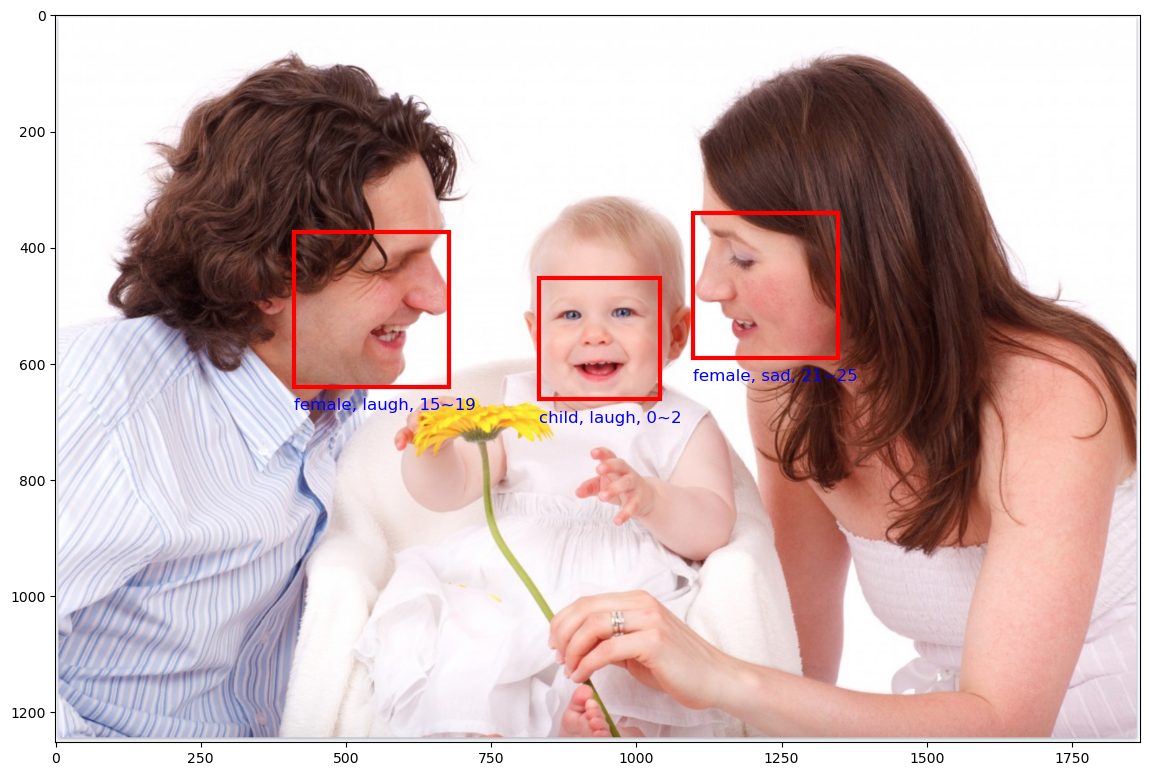

In [204]:
img = mpimg.imread('../data/naver/face_test_02.jpg')
fig,ax = plt.subplots(figsize=(14,10))
ax.imshow(img)

for each in detect_result['faces']:
    x, y, w, h = each['roi'].values()
    gender, gen_confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()
    age, age_confidence = each['age'].values()
    
    rect_face = patches.Rectangle((x,y),w,h, linewidth=3, 
                                  edgecolor='r', facecolor='none')
    
    ant_letter = gender + ', ' + emotion +', ' +  age
    plt.text(x, y+h+40, ant_letter, size=12, color='blue')
    ax.add_patch(rect_face)

plt.show()